<h1>데이터 전처리 및 불러오기</h1>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# CSV 파일 불러오기
df = pd.read_csv("D:/files/AAME.csv")

# 주식 가격의 핵심적인 4개 지표만 추출
df = df[['Open', 'High', 'Low', 'Close']]

# 결측값 제거 (필요한 경우)
df = df.dropna()

In [36]:
df

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [38]:
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

<h2>정규화 및 시계열 데이터 생성</h2>
<p>X: 60일간의 [Open, High, Low, Close] 값

y: 다음 날의 Close 값</p>

In [41]:
# 정규화
# 정규화 목적: 모델이 수치 범위에 덜 민감하도록 각 피처를 [0, 1] 사이로 변환
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 시계열 데이터 생성 (예: 60일 데이터로 다음날 Close 예측)
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 3])  # Close 값 예측
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

<h2>데이터 분할</h2>
<p>주식은 시간 순서가 중요하므로 shuffles=False</p>

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # 시계열이므로 shuffle=False
)


<h2>RNN 모델 정의 및 학습</h2>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# RNN 모델 정의
model_rnn = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


C:\Users\jaemi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 42/226 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328  

<h2>LSTM 모델 정의 및 학습</h2>

In [15]:
from tensorflow.keras.layers import LSTM

# LSTM 모델 정의
model_lstm = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


C:\Users\jaemi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0033 - val_loss: 3.5811e-05
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.9310e-04 - val_loss: 2.9108e-05
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.8062e-04 - val_loss: 2.5594e-05
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.6685e-04 - val_loss: 3.2628e-05
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.4866e-04 - val_loss: 2.4338e-05
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4235e-04 - val_loss: 3.9370e-05
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3343e-04 - val_loss: 2.1129e-05
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.4571e-04 - val_loss: 2.4039e-05
Epoch 9/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.2614e-04 - val_loss: 2.1235e-05
Epoch 10/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1630e-04 - val_loss: 1.9907e-05
Epoch 11/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.

<h2>예측 및 시각화</h2>

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


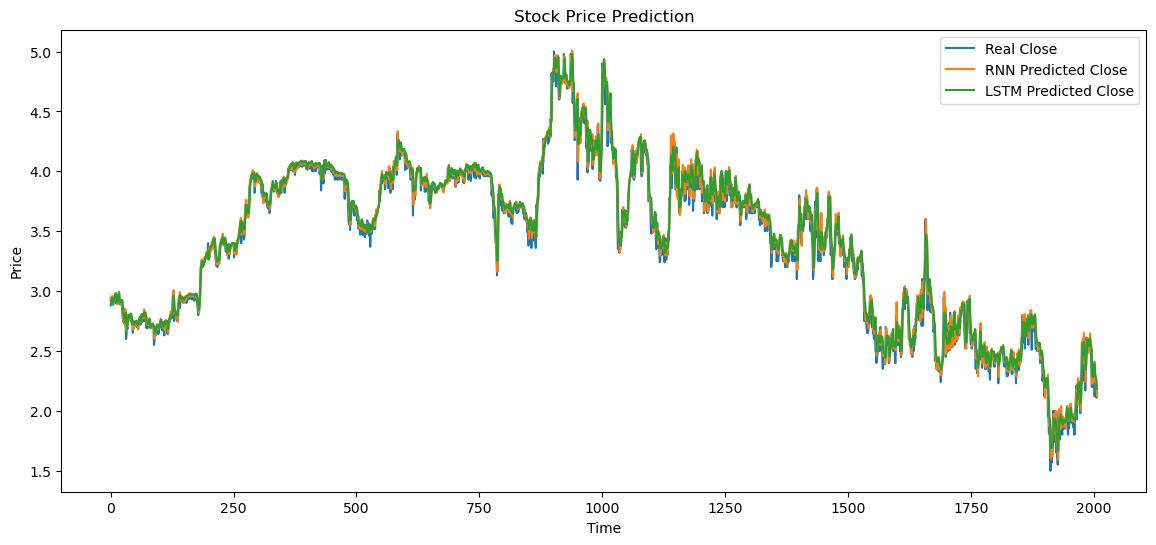

In [17]:
# 예측
y_pred_rnn = model_rnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)

# 역정규화
def inverse_transform_close(y_scaled):
    dummy = np.zeros((len(y_scaled), 4))
    dummy[:, 3] = y_scaled
    return scaler.inverse_transform(dummy)[:, 3]

real_close = inverse_transform_close(y_test)
pred_close_rnn = inverse_transform_close(y_pred_rnn.flatten())
pred_close_lstm = inverse_transform_close(y_pred_lstm.flatten())

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(real_close, label='Real Close')
plt.plot(pred_close_rnn, label='RNN Predicted Close')
plt.plot(pred_close_lstm, label='LSTM Predicted Close')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()
